# 1. 사전설정

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.7 MB/s eta 0:00:00


In [2]:
# Google Drive를 Colab 환경에 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리를 헬스케어 해커톤 모델 폴더로 변경
%cd /content/drive/MyDrive/02.git/healthcare-hackathon/model

Mounted at /content/drive
/content/drive/MyDrive/02.git/healthcare-hackathon/model


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="AtM8Y70pU2BSuYiPg3t3")
project = rf.workspace("animal-7o4sh").project("face_emotion_detecte-sloyo")
version = project.version(4)
dataset = version.download("coco")

ModuleNotFoundError: No module named 'roboflow'

In [4]:
id = '1D5yAVPgDcNdZrFzftgLnmOaEd-Swy-GF'
!gdown {id} -O /content/roboflow.zip
!unzip -q /content/roboflow.zip -d /content/emotion

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1D5yAVPgDcNdZrFzftgLnmOaEd-Swy-GF

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open /content/roboflow.zip, /content/roboflow.zip.zip or /content/roboflow.zip.ZIP.


In [6]:
!unzip -q /content/drive/MyDrive/05.share/roboflow.zip -d /content/emotion

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# 2. 데이터 확인

In [8]:
import json
annotation_file = '/content/emotion/train/_annotations.coco.json'

with open(annotation_file, 'r') as f:
  coco_data = json.load(f)


In [9]:
# 키 값 확인
coco_data.keys()

# categories
# 설명: 데이터셋에 포함된 카테고리(클래스) 정보를 포함

# images
# 설명: 데이터셋에 포함된 이미지 정보를 포함

# annotations
# 설명: 이미지에 대한 주석(객체 정보)을 포함

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [10]:
coco_data['categories']
# none 없음 확인함

[{'id': 0, 'name': 'face-emotion', 'supercategory': 'none'},
 {'id': 1, 'name': 'angry', 'supercategory': 'face-emotion'},
 {'id': 2, 'name': 'happy', 'supercategory': 'face-emotion'},
 {'id': 3, 'name': 'neutral', 'supercategory': 'face-emotion'},
 {'id': 4, 'name': 'sad', 'supercategory': 'face-emotion'}]

In [ ]:
images = coco_data['images']
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
annotations = coco_data['annotations']

# 각 클래스별 데이터 수를 저장할 딕셔너리 초기화
class_counts = {cat_id: 0 for cat_id in categories.keys()}

# 어노테이션을 순회하며 각 클래스별 데이터 수 카운트
for ann in annotations:
    cat_id = ann['category_id']
    if cat_id in class_counts:
        class_counts[cat_id] += 1

# 결과 출력
print("각 클래스별 학습 데이터 수:")
for cat_id, count in class_counts.items():
    print(f"{categories[cat_id]} (id: {cat_id}): {count}개")

각 클래스별 학습 데이터 수:
face-emotion (id: 0): 0개
angry (id: 1): 1398개
happy (id: 2): 1392개
neutral (id: 3): 1400개
sad (id: 4): 1402개


In [11]:
coco_data['annotations'][0]

{'id': 0,
 'image_id': 0,
 'category_id': 3,
 'bbox': [806, 427, 647.368, 925.788],
 'area': 599325.961,
 'segmentation': [],
 'iscrowd': 0}

In [20]:
name = coco_data['images'][0]['file_name']
category = coco_data['annotations'][0]['category_id']

In [22]:
coco_data['annotations'][0]['bbox']

[806, 427, 647.368, 925.788]

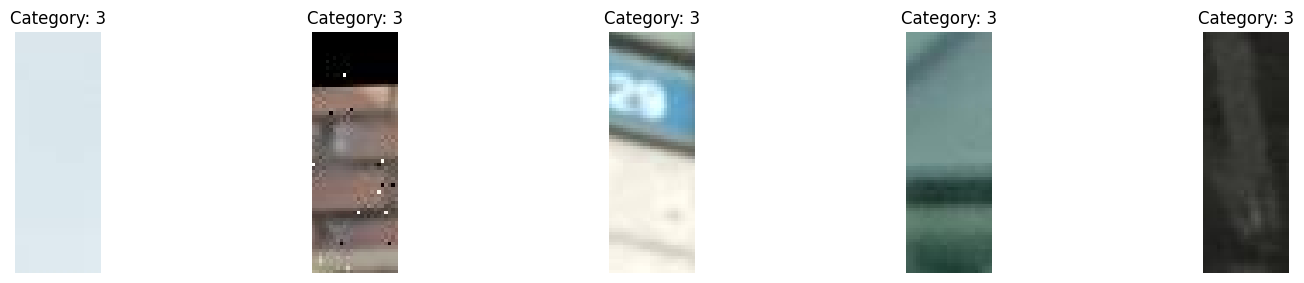

In [19]:
# subplot 설정 (1행 5열로 5개 이미지 표시)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1행 5열, figsize 조정
fig.tight_layout()

# 5개 이미지 반복
for i in range(5):
    # 이미지 정보 가져오기
    name = coco_data['images'][i]['file_name']
    category = coco_data['annotations'][i]['category_id']

    # 이미지 경로 설정
    path = f'/content/emotion/train/{name}'

    # 이미지 열기 및 크기 조정
    img = Image.open(path)
    img_cropped = img.crop((4, 10, 29, 80))  # (left, upper, right, lower) 좌표로 자르기

    # subplot에 이미지 표시
    ax = axes[i]  # 1행 5열로 배치
    ax.imshow(img_cropped)
    ax.set_title(f'Category: {category}')
    ax.axis('off')  # 축 숨기기

# 전체 plot 표시
plt.show()